___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
# Checking the shape of one image
X_train[7].shape

(28, 28)

In [8]:
X_train[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

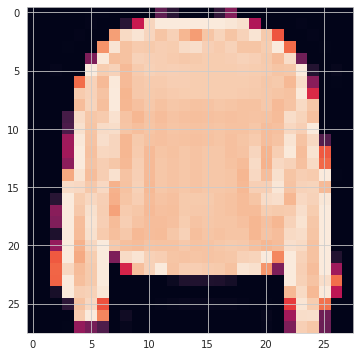

In [9]:
plt.imshow(X_train[7])
# plt.matshow(X_train[7])
plt.show()

In [10]:
y_train[9]

5

In [11]:
y_train.shape

(60000,)

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [14]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [16]:
classes[y_train[0]]

'Ankle boot'

In [17]:
classes[int(y_train[9])]

'Sandal'

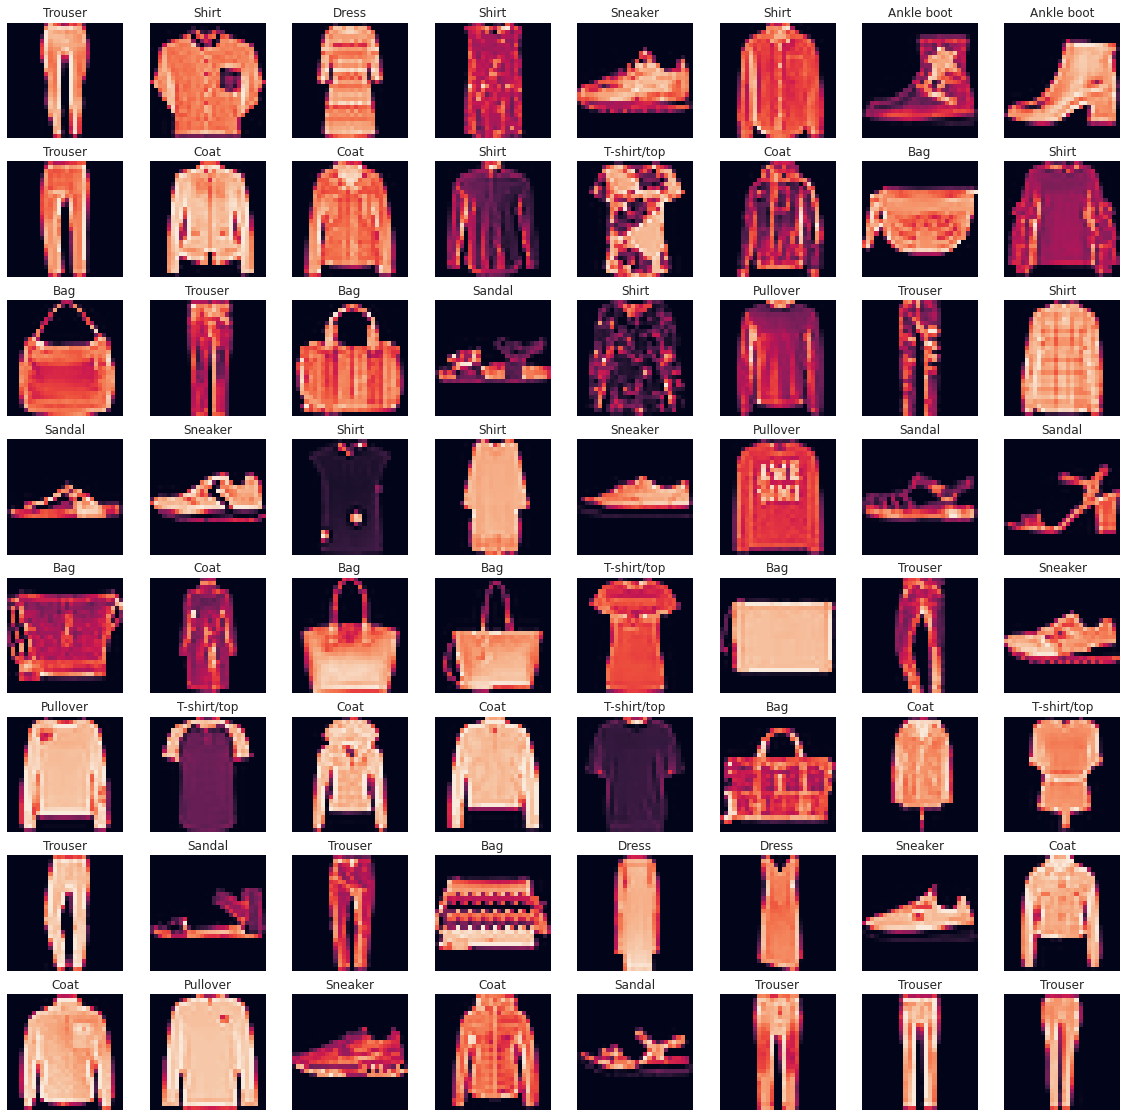

In [18]:
plt.figure(figsize=(20, 20))

for i in range(64):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [19]:
X_train[8].min()

0

In [20]:
X_train[8].max()

255

In [21]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [23]:
X_train[3].min()

0.0

In [24]:
X_train[3].max()

1.0

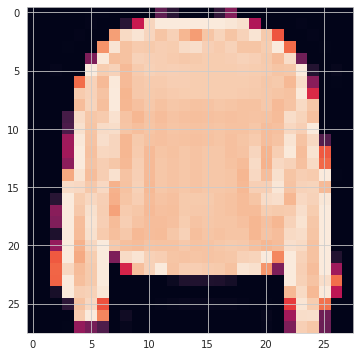

In [26]:
plt.imshow(X_train[7])
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [27]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [28]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [29]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [30]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [31]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [33]:
from tensorflow.keras.utils import to_categorical

In [34]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [35]:
y_train[6]

7

In [36]:
Y_train[6]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [38]:
X_train.shape[1:]

(28, 28, 1)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [40]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', strides=(1, 1), padding='same'))  # input_shape=X_train.shape[1:]
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 28)        7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 28)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1372)              0         
                                                                 
 dense (Dense)               (None, 128)              

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor='val_loss', mode="min", patience=2, restore_best_weights = True)

In [44]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 17s 4ms/step - loss: 0.4321 - accuracy: 0.8416 - val_loss: 0.3397 - val_accuracy: 0.8797
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2806 - accuracy: 0.8990 - val_loss: 0.2816 - val_accuracy: 0.9003
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2443 - accuracy: 0.9117 - val_loss: 0.2683 - val_accuracy: 0.9024
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2242 - accuracy: 0.9190 - val_loss: 0.2667 - val_accuracy: 0.9075
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2105 - accuracy: 0.9246 - val_loss: 0.3119 - val_accuracy: 0.8965
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2017 - accuracy: 0.9279 - val_loss: 0.2777 - val_accuracy: 0.9088


In [45]:
model.metrics_names

['loss', 'accuracy']

In [46]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.432,0.842,0.340,0.880
1,0.281,0.899,0.282,0.900
2,0.244,0.912,0.268,0.902
3,0.224,0.919,0.267,0.908
4,0.211,0.925,0.312,0.896


**TASK 7: Plot values of metrics you used in your model.**

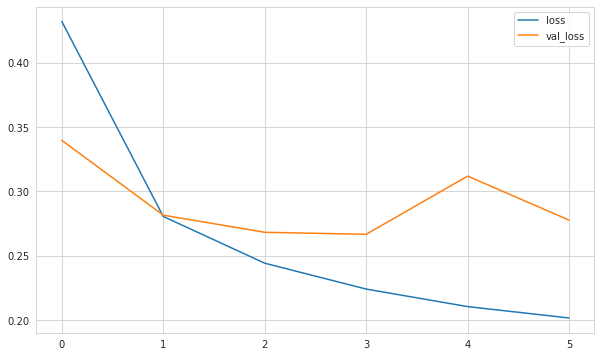

In [47]:
summary[["loss", "val_loss"]].plot();

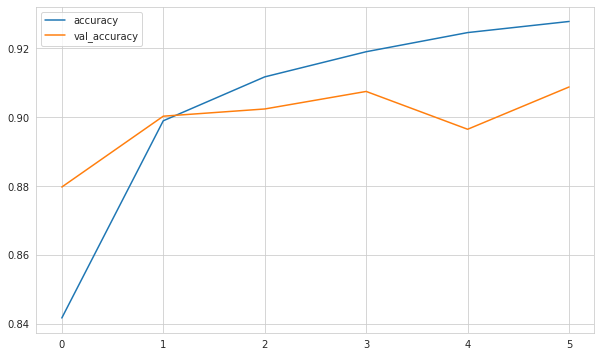

In [48]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2667 - accuracy: 0.9075


[0.2667202353477478, 0.9075000286102295]

In [51]:
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2667202353477478
Test accuracy: 0.9075000286102295


## Prediction

In [52]:
pred_prob = model.predict(X_test)

In [53]:
y_pred = np.argmax(pred_prob, axis=1)

In [54]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.80      0.91      0.85      1000
           3       0.93      0.89      0.91      1000
           4       0.85      0.84      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.81      0.65      0.72      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.98      0.99      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [56]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [57]:
print(confusion_matrix(y_test, y_pred))

[[908   0  17  12   3   2  55   0   3   0]
 [  0 985   0   9   2   0   3   0   1   0]
 [ 18   1 905   7  41   0  28   0   0   0]
 [ 38   7  16 889  26   0  23   0   1   0]
 [  3   1  89  22 844   0  41   0   0   0]
 [  0   0   0   0   0 986   0  10   0   4]
 [156   2  94  20  72   0 650   0   6   0]
 [  0   0   0   0   0  11   0 977   0  12]
 [  3   1   4   1   3   3   0   3 982   0]
 [  0   0   0   0   0   9   1  41   0 949]]


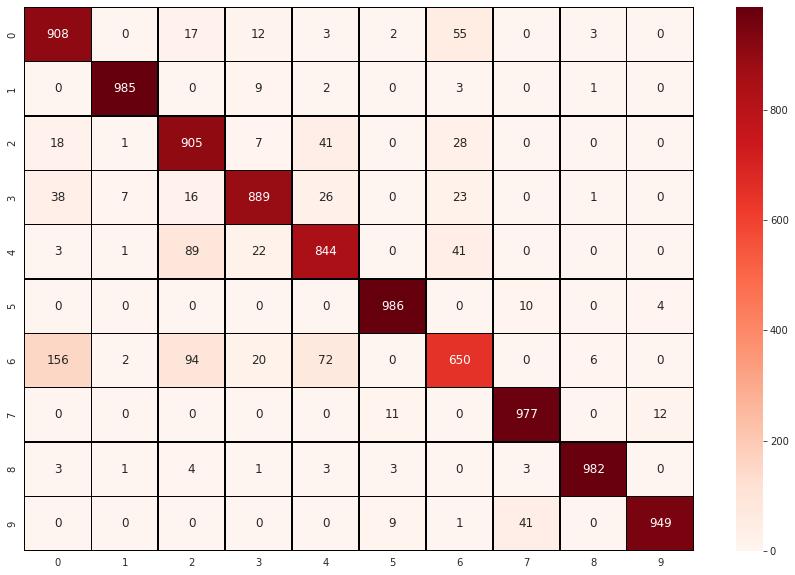

In [60]:
plt.figure(figsize=(15,10))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Reds", linewidths=.3, linecolor='black', xticklabels=classes, yticklabels=classes, fmt='g', annot_kws = {"size": 12})
plt.show()

In [ ]:
(y_test != y_pred).sum() # Total of False predictions

## **Modelling-2**

In [61]:
from tensorflow.keras.layers import BatchNormalization

In [64]:
model2= Sequential()

model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=X_train.shape[1:], padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2)))
model2.add(Dropout(0.4))    
model2.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2)))
model2.add(Dropout(0.4))
        
model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [73]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                      

In [66]:
early_stop = EarlyStopping(monitor='val_accuracy', mode="max", patience=2, restore_best_weights = True)

In [72]:
model2.fit(X_train, Y_train, batch_size=32, epochs=30, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.7968 - accuracy: 0.7302 - val_loss: 0.3875 - val_accuracy: 0.8575
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4703 - accuracy: 0.8473 - val_loss: 0.3228 - val_accuracy: 0.8868
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4009 - accuracy: 0.8702 - val_loss: 0.3092 - val_accuracy: 0.8932
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3671 - accuracy: 0.8821 - val_loss: 0.2863 - val_accuracy: 0.8992
Epoch 5/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3414 - accuracy: 0.8911 - val_loss: 0.2635 - val_accuracy: 0.9060
Epoch 6/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3194 - accuracy: 0.8984 - val_loss: 0.2491 - val_accuracy: 0.9179
Epoch 7/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3109 - accuracy: 0.9007 - val_loss: 0.2528 - val_ac

In [74]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.797,0.730,0.388,0.858
1,0.470,0.847,0.323,0.887
2,0.401,0.870,0.309,0.893
3,0.367,0.882,0.286,0.899
4,0.341,0.891,0.264,0.906


Plot values of metrics you used in your model.

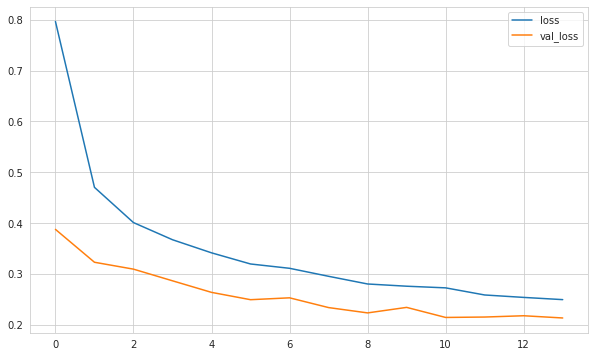

In [75]:
summary[["loss", "val_loss"]].plot();

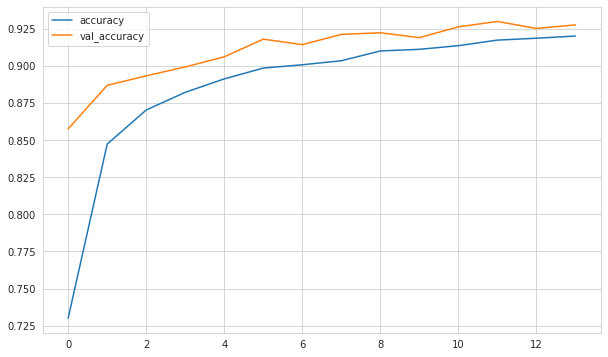

In [76]:
summary[["accuracy", "val_accuracy"]].plot();

# Model Evaluation

TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.

In [78]:
score = model2.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21496757864952087
Test accuracy: 0.9297999739646912


Prediction

In [79]:
pred_prob = model2.predict(X_test)

In [80]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1000
           1       1.00      0.99      0.99      1000
           2       0.93      0.87      0.90      1000
           3       0.94      0.94      0.94      1000
           4       0.85      0.94      0.89      1000
           5       0.99      0.98      0.98      1000
           6       0.81      0.75      0.78      1000
           7       0.95      0.99      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [82]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [83]:
print(confusion_matrix(y_test, y_pred))

[[896   0  12   9   2   1  77   0   3   0]
 [  1 986   0   9   1   0   2   0   1   0]
 [ 16   1 869   8  62   1  41   0   2   0]
 [ 10   1   6 938  25   0  20   0   0   0]
 [  2   0  13  11 942   0  32   0   0   0]
 [  0   0   0   0   0 981   0  14   0   5]
 [ 98   1  38  24  79   1 754   0   5   0]
 [  0   0   0   0   0   2   0 989   0   9]
 [  1   1   0   4   1   1   0   2 990   0]
 [  0   0   0   0   0   6   0  41   0 953]]


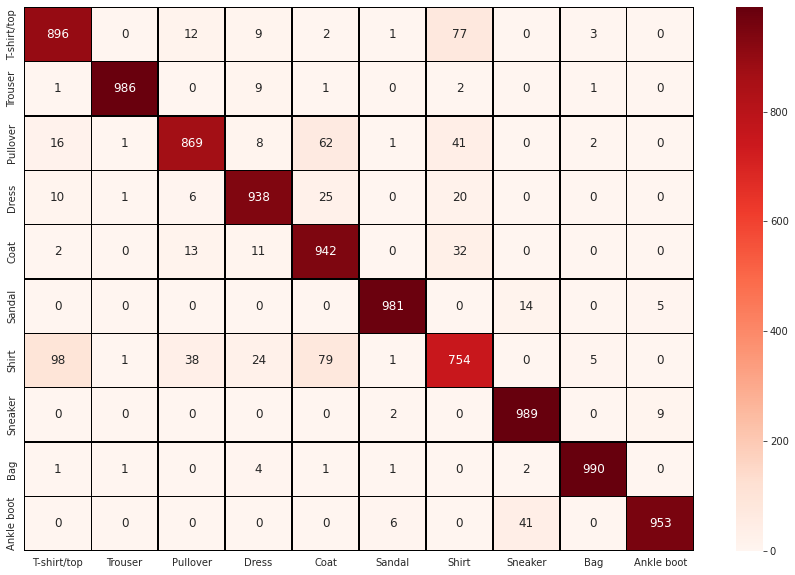

In [85]:
plt.figure(figsize=(15,10))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Reds", linewidths=.3, xticklabels=classes, yticklabels=classes, linecolor='black', fmt='g', annot_kws = {"size": 12})
plt.show()

In [86]:
(y_test != y_pred).sum() # Total of False predictions

702

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___